In [1]:
import torch
import numpy as np
from transformers import AutoModel, AutoTokenizer
from sklearn.cluster import KMeans, DBSCAN, AffinityPropagation
import matplotlib.pyplot as plt
import pandas as pd

c:\Users\ericz\miniconda3\envs\cc\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
tokenizer = AutoTokenizer.from_pretrained("sentence-transformers/RoBERTa-base-nli-stsb-mean-tokens")
model = AutoModel.from_pretrained("sentence-transformers/RoBERTa-base-nli-stsb-mean-tokens")

In [40]:
# Load sentences from file
df = pd.read_csv("comments.csv")

In [41]:
# df = df[df['comments'] != '']
# df['comments'].size
df = df.dropna()
df['comments'].size

1464

In [42]:
embeddings = []
for text in df.comments:
  tokens = tokenizer.encode(text, add_special_tokens=True)
  input_ids = torch.tensor([tokens])

  with torch.no_grad():
    outputs = model(input_ids)
    last_hidden_states = outputs.last_hidden_state

  sentence_embedding = torch.mean(last_hidden_states, dim=1).squeeze()
  embeddings.append(sentence_embedding)

In [43]:
X = np.array(embeddings)
X.shape

(1464, 768)

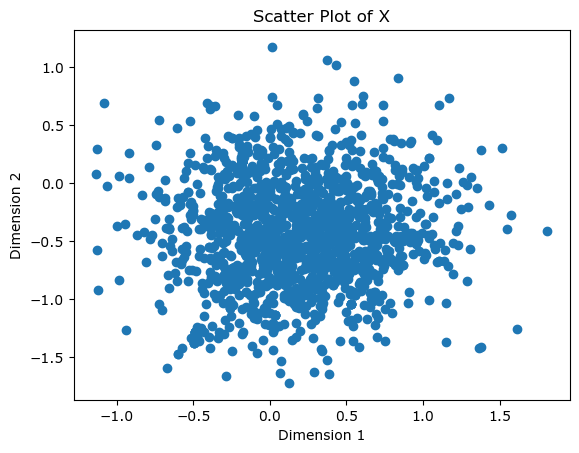

In [44]:
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Scatter Plot of X')
plt.show()

In [45]:
# cluster = DBSCAN(eps=2, min_samples=2)
# cluster = KMeans(n_clusters=2, random_state=42)
cluster = AffinityPropagation(random_state=42)
cluster_labels = cluster.fit_predict(X)

print(cluster_labels)

[ 18   0  60 ...  89  74 102]


In [46]:
sorted_cluster_labels = np.sort(cluster_labels)
sorted_cluster_labels

array([  0,   0,   0, ..., 117, 117, 117], dtype=int64)

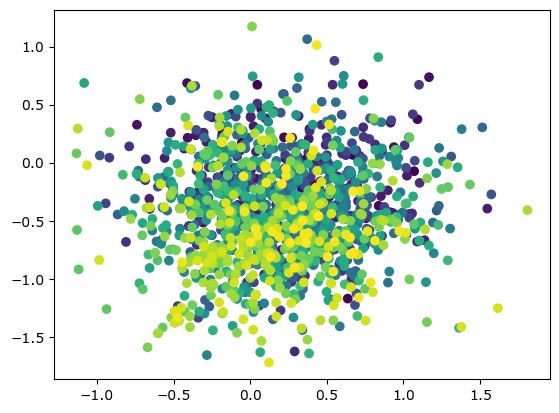

In [47]:
plt.scatter(X[:, 0], X[:, 1], c=sorted_cluster_labels)

In [48]:
df['cluster'] = cluster_labels

In [51]:
df.groupby('cluster').count()

,Unnamed: 0,comments
cluster,,
0,20,20
1,8,8
2,11,11
3,9,9
4,8,8
...,...,...
113,3,3
114,7,7
115,19,19


In [52]:
for i in range(len(df.cluster.unique())):
  print('Cluster {}:'.format(i))
  print(df.loc[df['cluster'] == i, 'comments'])
  print()

Cluster 0:
1       Bruno Mars is one of the top pop musicians, gr...
44      Bruno Mars is one of the top pop musicians of ...
78      What a lucky talent Bruno Mars has, he's a won...
116     This production is a true masterpiece...and th...
132     Mark Ronson, very talented and business savvy....
148     I know right! Bruno Mars is amazing.he should ...
170     even tho Bruno gave a godly voice to the song,...
174     everyone is talking about bruno mars, and yes ...
198     Bruno Mars is one of the top pop musicians, gr...
255     5 freaking billions of views. Oh my God, Bruno...
258                     It's like a 90s pop and rock song
319                        Bruno has got one awsome voice
488     Great song. The melody is very similar to West...
575     Bruno Mars is amazing HE is my pure raw talent...
585                             Mark Ronson is good music
619     Bruno mars "Half Filipino, Half American" = We...
748                     ️Caution this song is addictive ️
834